In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import time 
import seaborn as sn
import matplotlib.pyplot as plt
import time 

In [2]:
data = pd.read_csv(r'subsetkdd99_proc.csv')
#print(len(data))
#print(len(data.columns))


In [3]:
start=time.time()

data = np.array(data)

#np.random.shuffle(data)

num_train = int(.8 * len(data))  # 80/ train/test split
print("num_train",num_train)

x_train, y_train = data[:, :-1], data[:, -1]

#x_test, y_test = data[num_train:, :-1], data[num_train:, -1]


num_train 852


In [4]:
def cost(weight, x, y):
    
    z=np.dot(x,weight)
    h = 1 / (1 + np.exp(-z))
    
    factor=len(y) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    
    #print("factor",factor)
    
    cost = 1 / factor 
    prod=np.dot((y - h),x)
    
    factor_grad =len(y) *prod 
    
   # print("factor_grad",factor_grad)
    
    grad = 1 / factor_grad
    return cost, grad

In [5]:
def evaluate(x, y, iterations=10, alpha=0.1):
    
    x = np.insert(x, 0, 1, axis=1)
    weights = []
    classes = np.unique(y)
    costval = np.zeros(iterations)

    for clas in classes:
        #print("C----------------:",clas)
        single_class = np.where(y == clas, 1, 0)

        weight = np.zeros(x.shape[1])
        
        for i in range(iterations):
            
            costval[i],grad = cost(weight, x, single_class)
            weight =weight + (alpha * grad)

        weights.append(weight)
        
    return weights, classes, costval

In [6]:
def class_predict(classes,weights, dataset):
    
    dataset = np.insert(dataset, 0, 1, axis=1)
    val_list=[]
    preds=[]
    
    preds = [np.argmax([1 / (1 + np.exp(-(np.dot(val,weight)))) for weight in weights]) for val in dataset]
                
    predicted=[classes[predval] for predval in preds]
    #print("predicted",predicted)
    
    return predicted

D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0      0.000     0.000     0.000       100
         1.0      0.621     0.600     0.610        30
         2.0      0.667     0.250     0.364         8
         3.0      0.979     0.887     0.931        53
         4.0      0.000     0.000     0.000        12
         5.0      0.335     0.732     0.460        97
         6.0      0.000     0.000     0.000        19
         7.0      0.000     0.000     0.000         9
         8.0      0.250     0.286     0.267         7
         9.0      0.478     1.000     0.647        99
        10.0      0.000     0.000     0.000        31
        11.0      0.000     0.000     0.000       100
        12.0      0.000     0.000     0.000         3
        13.0      0.000     0.000     0.000         4
        14.0      0.000     0.000     0.000        92
        15.0      1.000     0.014     0.028        70
        16.0      0.000     0.000     0.000        10
        17.0      0.672    

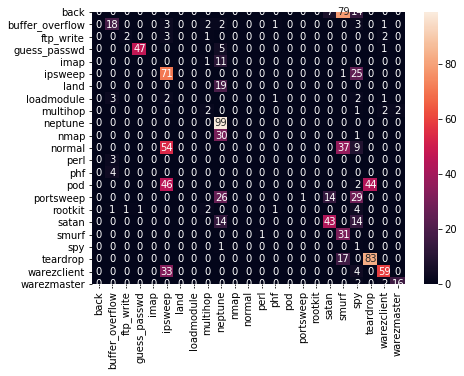

In [7]:
weights, classes, costval = evaluate(x_train, y_train)

predicted=class_predict(classes,weights,x_train)

classes_label=['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule','multihop', 'neptune', 'nmap',
        'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster']
        
actual1=[classes_label[int(i)] for i in y_train]
predicted1 = [classes_label[int(i)] for i in predicted]
    
mat=confusion_matrix(actual1 ,predicted1,labels=classes_label)
df_cm = pd.DataFrame(mat, index=[i for i in classes_label],columns=[i for i in classes_label])
plt.figure(figsize=(7, 5))
sn.heatmap(df_cm, annot=True)

end=time.time()

print(metrics.classification_report(y_train, predicted, digits=3))

print(accuracy_score(y_train, predicted))

print("Time taken by the algorithm in seconds:-",end-start)
